## Introduction

**Types of clustering methods:**


*   hard clustering: clusters do not overlap (element either belongs to cluster or it does not)
*   soft clustering: clusters may overlap (strength of association between clusters and instances)

**Mixture models:**


*   probabilistically-grounded way of doing soft clustering
*   each cluster: a generative model (Gaussian or multinomial)
*   parameters (e.g. mean/covariance are unknown)


To read more: [EM algorithm and Gaussian Mixture Model (GMM)](https://oxannemiu.medium.com/em-algorithm-and-gaussian-mixture-model-gmm-6ea5e0cf9d6e)

Let's generate a sample dataset where points are generated from one of two Gaussian processes. The first distribution will have the mean of 100, the second distribution - 90; and distributions have standard deviation of 5 and 2 respectively.

We will have 60,000 points in the first process; 50,000 points in the second process and mix them together.

In [1]:
# import libraries
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
Mean1, Mean2  = 100.0, 90.0
Standard_dev1, Standard_dev2 = 5.0, 2.0
sample1, sample2 = 60000, 50000

print('Input Normal_distb {:}: μ = {:1}, σ = {:.2}, n = {} '.format("1", Mean1, Standard_dev1, sample1))
print('Input Normal_distb {:}: μ = {:1}, σ = {:.2}, n = {} '.format("2", Mean2, Standard_dev2, sample2))

Input Normal_distb 1: μ = 100.0, σ = 5.0, n = 60000 
Input Normal_distb 2: μ = 90.0, σ = 2.0, n = 50000 


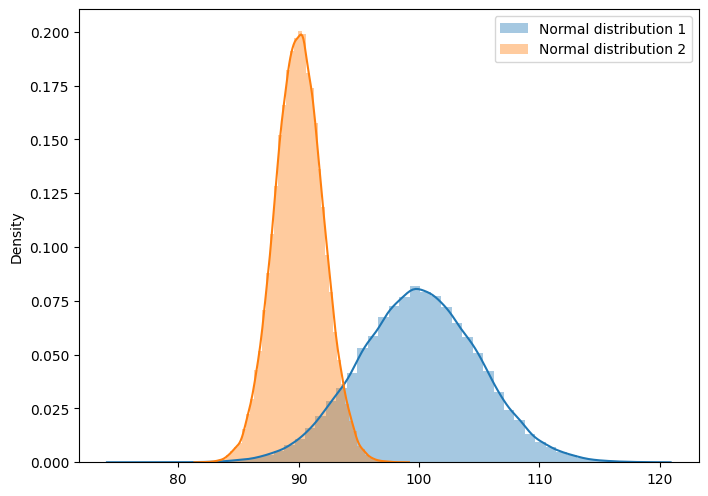

In [3]:
# generate data
X1 = np.random.normal(loc = Mean1, scale = Standard_dev1, size = sample1)
X2 = np.random.normal(loc = Mean2, scale = Standard_dev2, size = sample2)

# plot
fig = plt.figure(figsize=(8, 6), dpi=100)
sns.distplot(X1, bins=50, kde=True, norm_hist=True, label='Normal distribution 1')
sns.distplot(X2, bins=50, kde=True, norm_hist=True, label='Normal distribution 2')
plt.legend()
plt.show()
# save
fig.savefig('norm_distrib12.jpeg')

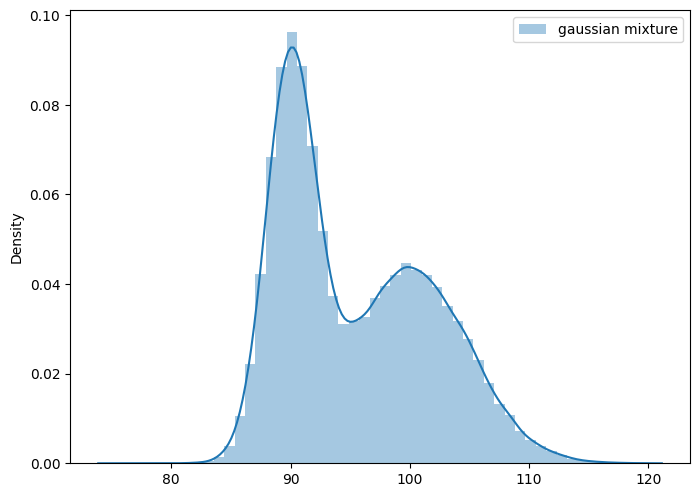

In [4]:
# mix two distrib together
X = np.hstack((X1, X2))

# plot
fig = plt.figure(figsize=(8, 6), dpi=100)
sns.distplot(X, bins=50, kde=True, norm_hist=True, label='gaussian mixture')
plt.legend()
plt.show()
# save
fig.savefig('final_dt.jpeg')

So after mixing the processes together, we have the dataset that we see on the plot above. We can notice 2 peaks: around 90 and 100, but for many of the points in the middle of the peaks it is ambiguous to which distribution they were drawn from. So how can we solve this task? We can use a Gaussian Mixture Model that will estimate the parameters of the distributions using the expectation-maximization algorithm.

## **The Expectation-Maximization Algorithm**, or EM algorithm for short, is an approach for maximum likelihood estimation in the presence of latent variables.

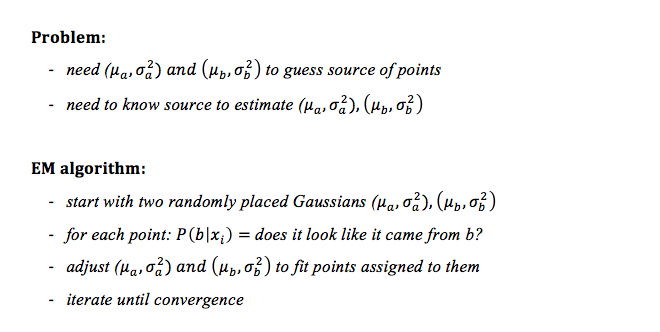

In [5]:
# reshape into a table with one column
X = X.reshape((len(X), 1))

In [6]:
# fit model
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components = 2, init_params = 'random')
GMM.fit(X)
print('Converged:', GMM.converged_) # check if the model has converged

Converged: True


In [7]:
# predict posterior probability of each component given the data.
Y = np.array([[105.0]])
prediction = GMM.predict_proba(Y)
print('Probability each Gaussian (state) in the model given each sample p = {}'.format(prediction))
print()
# predict latent values
yhat = GMM.predict(X)

# check latent value for first few points
print(yhat[:100])
# check latent value for last few points
print(yhat[-100:])

Probability each Gaussian (state) in the model given each sample p = [[0.50111506 0.49888494]]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [8]:
#check amount of points in each cluster
print(len(yhat[yhat==0]))
print(len(yhat[yhat==1]))

56735
53265


## Multivariate Gaussians: d > 1

Converged: True
Probability each Gaussian (state) in the model given each sample p = [[0.002454   0.00543952 0.99210648]]


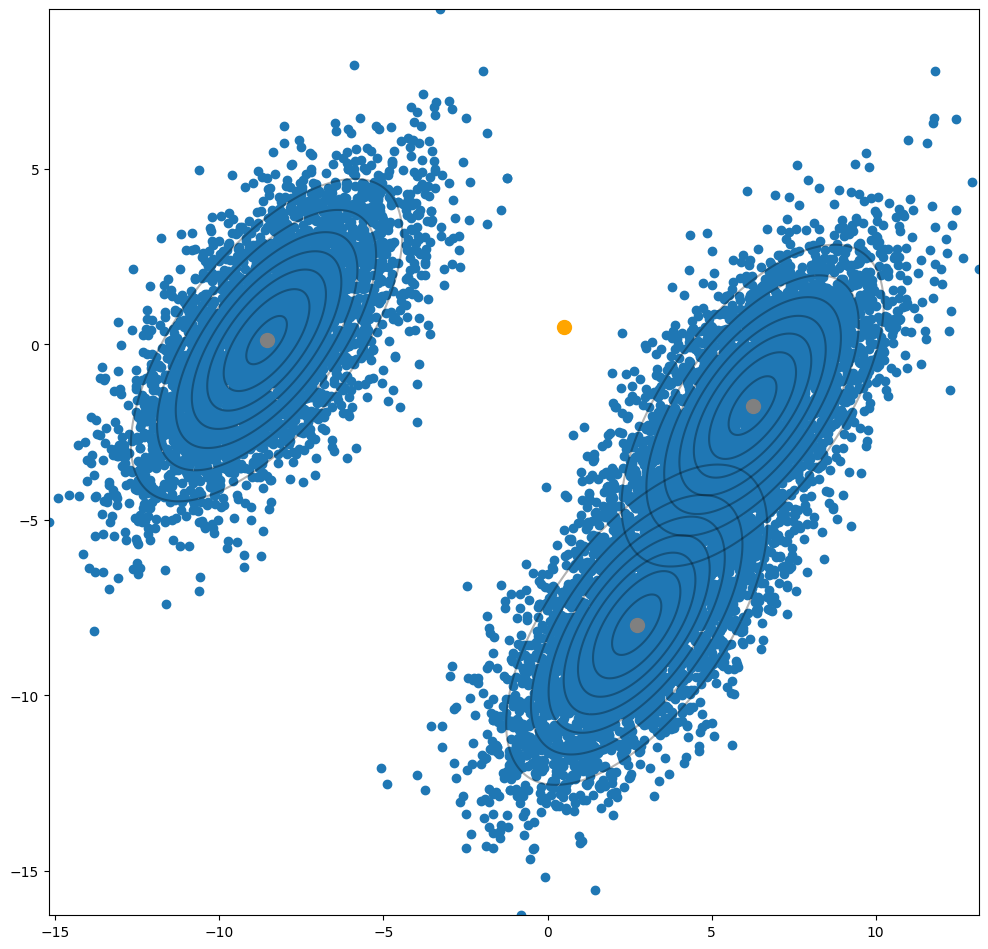

In [9]:
from sklearn.datasets.samples_generator import make_blobs
from scipy.stats import multivariate_normal

# create dataset
X, Y = make_blobs(cluster_std=1.0, random_state=123, n_samples=12000, centers=3)

# stratch dataset to get ellipsoid data
X = np.dot(X, np.random.RandomState(0).randn(2,2))

x, y = np.meshgrid(np.sort(X[:,0]), np.sort(X[:,1]))
XY = np.array([x.flatten(), y.flatten()]).T

GMM = GaussianMixture(n_components=3).fit(X) # instantiate and fit the model
print('Converged:', GMM.converged_) # check if the model has converged
means = GMM.means_ 
covariances = GMM.covariances_

# predict
Y = np.array([[0.5], [0.5]])
prediction = GMM.predict_proba(Y.T)
print('Probability each Gaussian (state) in the model given each sample p = {}'.format(prediction))

# Plot   
fig = plt.figure(figsize = (12,12), dpi = 100)
ax0 = fig.add_subplot(111)
ax0.scatter(X[:,0], X[:,1])
ax0.scatter(Y[0,:], Y[1,:], c = 'orange', zorder = 10, s = 100)
for m,c in zip(means,covariances):
    multi_normal = multivariate_normal(mean = m, cov = c)
    ax0.contour(np.sort(X[:,0]), np.sort(X[:,1]), multi_normal.pdf(XY).reshape(len(X), len(X)), colors='black', alpha=0.3)
    ax0.scatter(m[0], m[1], c = 'grey', zorder = 10, s = 100)
    
plt.show()

fig.savefig('3d.jpeg')

## References:

*   Expectation Maximization: how it works - https://youtu.be/iQoXFmbXRJA
*   Computational Statistics in Python: Expectation Maximization (EM) Algorithm - https://people.duke.edu/~ccc14/sta-663/EMAlgorithm.html
*   Unsupervised learning: Clustering: Gaussian Mixture Models (GMM) - https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php
*   An Introduction to Hidden Markov Models and Bayesian Networks - http://mlg.eng.cam.ac.uk/zoubin/papers/ijprai.pdf










### Thanks for reading and I hope it was informative for you! 


About Last updated: 2021-08-12

Created by: Oksana Kalytenko

Twitter: [@Oxanne_k](https://twitter.com/Oxanne_k)

Medium: [Oxanne](https://oxannemiu.medium.com/)